# Produce the sample collection map as an SVG

In [1]:
# Imports
import ag3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
from matplotlib.lines import Line2D
import matplotlib.patches as patches
import matplotlib.patheffects as PathEffects

## Get the sample metadata for all of the wild sample sets

In [2]:
# Get the ag3 data
ag3_data = ag3.release_data()

In [3]:
# Get the list of all the wild sample sets
sample_sets = ag3_data.all_wild_sample_sets

In [4]:
# Eyeball the list of sample sets
sample_sets

['AG1000G-AO',
 'AG1000G-BF-A',
 'AG1000G-BF-B',
 'AG1000G-BF-C',
 'AG1000G-CD',
 'AG1000G-CF',
 'AG1000G-CI',
 'AG1000G-CM-A',
 'AG1000G-CM-B',
 'AG1000G-CM-C',
 'AG1000G-FR',
 'AG1000G-GA-A',
 'AG1000G-GH',
 'AG1000G-GM-A',
 'AG1000G-GM-B',
 'AG1000G-GM-C',
 'AG1000G-GN-A',
 'AG1000G-GN-B',
 'AG1000G-GQ',
 'AG1000G-GW',
 'AG1000G-KE',
 'AG1000G-ML-A',
 'AG1000G-ML-B',
 'AG1000G-MW',
 'AG1000G-MZ',
 'AG1000G-TZ',
 'AG1000G-UG']

In [5]:
# Get the metadata for all samples in these sample sets
sample_meta = ag3_data.load_sample_set_metadata(sample_sets)

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [6]:
# Eyeball some of the sample metadata
sample_meta.head()

,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,is_arabiensis,is_gamb_colu,is_gambiae,is_coluzzii
sample_id,,,,,,,,,,,,,,,,,,
AR0047-C,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.945,0.001,gamb_colu,coluzzii,False,True,False,True
AR0049-C,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.933,0.001,gamb_colu,coluzzii,False,True,False,True
AR0051-C,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.937,0.002,gamb_colu,coluzzii,False,True,False,True
AR0061-C,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.938,0.002,gamb_colu,coluzzii,False,True,False,True
AR0078-C,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.926,0.001,gamb_colu,coluzzii,False,True,False,True


In [7]:
# Eyeball the number of metadata records (i.e. samples) for each sample set
sample_meta.sample_set.value_counts()

AG1000G-CM-A    303
AG1000G-TZ      300
AG1000G-UG      290
AG1000G-GN-B    185
AG1000G-BF-A    181
AG1000G-GM-C    174
AG1000G-BF-B    102
AG1000G-GW      101
AG1000G-GH      100
AG1000G-CM-B     97
AG1000G-KE       86
AG1000G-AO       81
AG1000G-CI       80
AG1000G-CD       76
AG1000G-GM-A     74
AG1000G-MZ       74
AG1000G-CF       73
AG1000G-ML-B     71
AG1000G-GA-A     69
AG1000G-ML-A     60
AG1000G-GN-A     45
AG1000G-CM-C     44
AG1000G-MW       41
AG1000G-GM-B     31
AG1000G-FR       23
AG1000G-BF-C     13
AG1000G-GQ       10
Name: sample_set, dtype: int64

### See which sample sets contain samples from more than 1 country

In [8]:
# Crosstab the sample_set ids with their countries, to count the number of samples in each country for each sample set
sample_set_by_country = pd.crosstab(sample_meta.sample_set, sample_meta.country)
sample_set_by_country.head()

country,Angola,Burkina Faso,Cameroon,Central African Republic,Cote d'Ivoire,Democratic Republic of Congo,Equatorial Guinea,Gabon,"Gambia, The",Ghana,Guinea,Guinea-Bissau,Kenya,Malawi,Mali,Mayotte,Mozambique,Tanzania,Uganda
sample_set,,,,,,,,,,,,,,,,,,,
AG1000G-AO,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AG1000G-BF-A,0,181,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AG1000G-BF-B,0,102,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AG1000G-BF-C,0,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
AG1000G-CD,0,0,0,0,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
# Eyeball sample sets that have samples in multiple countries
# `sample_set_by_country > 0` is true where a sample set has samples in that country,
# so this sums the number of trues per row, and returns those that have > 1, i.e. samples for more than 1 country 
sample_set_by_country.loc[(sample_set_by_country > 0).sum(axis=1) > 1]

country,Angola,Burkina Faso,Cameroon,Central African Republic,Cote d'Ivoire,Democratic Republic of Congo,Equatorial Guinea,Gabon,"Gambia, The",Ghana,Guinea,Guinea-Bissau,Kenya,Malawi,Mali,Mayotte,Mozambique,Tanzania,Uganda
sample_set,,,,,,,,,,,,,,,,,,,
AG1000G-GN-B,0,0,0,0,0,0,0,0,0,0,91,0,0,0,94,0,0,0,0


### Convert the lat, long of all of the Mayotte sample metadata into the mean value, so that they are treated as one site, and represented as one pie on the map

In [10]:
sample_meta.loc[(sample_meta.country == 'Mayotte'),'latitude'] = sample_meta[sample_meta.country == 'Mayotte'].latitude.mean()
sample_meta.loc[(sample_meta.country == 'Mayotte'),'longitude'] = sample_meta[sample_meta.country == 'Mayotte'].longitude.mean()
sample_meta[sample_meta.country == 'Mayotte'].head()

,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,is_arabiensis,is_gamb_colu,is_gambiae,is_coluzzii
sample_id,,,,,,,,,,,,,,,,,,
AP0007-C,60,Igor Sharakhov,Mayotte,Mtsamboro Forest Reserve,2011,-1,-12.857087,45.137435,F,AG1000G-FR,0.035,0.003,gamb_colu,gambiae,False,True,True,False
AP0021-C,92,Igor Sharakhov,Mayotte,Karihani Lake,2011,-1,-12.857087,45.137435,F,AG1000G-FR,0.034,0.003,gamb_colu,gambiae,False,True,True,False
AP0019-C,88,Igor Sharakhov,Mayotte,Mtsanga Charifou,2011,-1,-12.857087,45.137435,M,AG1000G-FR,0.039,0.003,gamb_colu,gambiae,False,True,True,False
AP0020-C,78,Igor Sharakhov,Mayotte,Mtsanga Charifou,2011,-1,-12.857087,45.137435,M,AG1000G-FR,0.039,0.003,gamb_colu,gambiae,False,True,True,False
AP0009-C,62,Igor Sharakhov,Mayotte,Combani,2011,-1,-12.857087,45.137435,M,AG1000G-FR,0.038,0.003,gamb_colu,gambiae,False,True,True,False


### Amend country names for map presentation and data-alignment

In [11]:
sample_meta.country = sample_meta.country.str.replace("Gambia, The", "The Gambia").str.replace("Equatorial Guinea", "Bioko")

In [12]:
# Eyeball the amended country names
sample_meta.country.unique()

array(['Angola', 'Burkina Faso', 'Democratic Republic of Congo',
       'Central African Republic', "Cote d'Ivoire", 'Cameroon', 'Mayotte',
       'Gabon', 'Ghana', 'The Gambia', 'Guinea', 'Mali', 'Bioko',
       'Guinea-Bissau', 'Kenya', 'Malawi', 'Mozambique', 'Tanzania',
       'Uganda'], dtype=object)

## Define the sites as samples with the same latitude and longitude

In [13]:
# Get the sample counts by site, where a site is a unique lat, long. Include country for reference.
sites = sample_meta.groupby(['latitude', 'longitude', 'country']).size().reset_index(name='nsamples')

In [14]:
# Eyeball the number of samples in each site
sites

,latitude,longitude,country,nsamples
0,-23.716000,35.299000,Mozambique,74
1,-15.933000,34.755000,Malawi,41
2,-12.857087,45.137435,Mayotte,23
3,-8.884000,13.302000,Angola,81
4,-4.940000,38.948000,Tanzania,43
...,...,...,...,...
113,13.417000,-16.033000,The Gambia,19
114,13.550000,-15.900000,The Gambia,74
115,13.550000,-15.617000,The Gambia,1
116,13.567000,-14.917000,The Gambia,174


### Assign each site a unique identifier (short-hand for the unique map coordinates)

In [15]:
# Name the index 'site_id', effectively assigning a unique identifier to each site
sites.index.name = 'site_id'

In [16]:
# Eyeball the site ids
sites

,latitude,longitude,country,nsamples
site_id,,,,
0,-23.716000,35.299000,Mozambique,74
1,-15.933000,34.755000,Malawi,41
2,-12.857087,45.137435,Mayotte,23
3,-8.884000,13.302000,Angola,81
4,-4.940000,38.948000,Tanzania,43
...,...,...,...,...
113,13.417000,-16.033000,The Gambia,19
114,13.550000,-15.900000,The Gambia,74
115,13.550000,-15.617000,The Gambia,1


In [17]:
# Eyeball the sites sorted by nsamples (this doesn't change the df)
sites.sort_values('nsamples')

,latitude,longitude,country,nsamples
site_id,,,,
76,9.703,13.859,Cameroon,1
45,6.915,13.132,Cameroon,1
78,9.765,13.950,Cameroon,1
25,4.166,11.535,Cameroon,1
59,8.476,13.644,Cameroon,1
...,...,...,...,...
28,4.341,13.558,Cameroon,110
97,11.233,-4.472,Burkina Faso,128
7,-1.962,31.651,Tanzania,170


## Separate out the sites that do not have many samples

In [18]:
# Get the subset of sites with nsamples >= cutoff
site_nsamples_cutoff = 10
sites_with_many_samples = sites[sites.nsamples >= site_nsamples_cutoff].copy()

In [19]:
# Eyeball the subset df
sites_with_many_samples.head()

,latitude,longitude,country,nsamples
site_id,,,,
0,-23.716000,35.299000,Mozambique,74
1,-15.933000,34.755000,Malawi,41
2,-12.857087,45.137435,Mayotte,23
3,-8.884000,13.302000,Angola,81
4,-4.940000,38.948000,Tanzania,43


In [20]:
# Eyeball the number of unique lats and longs, for the sites with nsamples >= cutoff
print('Num. sites with nsamples >= cutoff:', len(sites_with_many_samples))
print('Num. unique latitudes:', len(sites_with_many_samples.latitude.unique()))
print('Num. unique longitudes:', len(sites_with_many_samples.longitude.unique()))

Num. sites with nsamples >= cutoff: 43
Num. unique latitudes: 43
Num. unique longitudes: 42


## Get the metadata for sites with many samples 

In [21]:
# Get the sample metadata for the subset of sites with nsamples >= cutoff, preserving species call columns
sample_meta_for_sites_with_many_samples = sample_meta.merge(sites_with_many_samples.reset_index()[['longitude','latitude','site_id']])

In [22]:
# Eyeball some of the data
sample_meta_for_sites_with_many_samples.head()

,partner_sample_id,contributor,country,location,year,month,latitude,longitude,sex_call,sample_set,aim_fraction_colu,aim_fraction_arab,species_gambcolu_arabiensis,species_gambiae_coluzzii,is_arabiensis,is_gamb_colu,is_gambiae,is_coluzzii,site_id
0,LUA047,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.945,0.001,gamb_colu,coluzzii,False,True,False,True,3
1,LUA049,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.933,0.001,gamb_colu,coluzzii,False,True,False,True,3
2,LUA051,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.937,0.002,gamb_colu,coluzzii,False,True,False,True,3
3,LUA061,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.938,0.002,gamb_colu,coluzzii,False,True,False,True,3
4,LUA078,Joao Pinto,Angola,Luanda,2009,4,-8.884,13.302,F,AG1000G-AO,0.926,0.001,gamb_colu,coluzzii,False,True,False,True,3


In [23]:
# Eyeball the number of unique lats and longs, for the sites with nsamples >= cutoff
print('Num. unique latitudes:', len(sample_meta_for_sites_with_many_samples.latitude.unique()))
print('Num. unique longitudes:', len(sample_meta_for_sites_with_many_samples.longitude.unique()))

Num. unique latitudes: 43
Num. unique longitudes: 42


## Get the species calls for sites with many samples

In [24]:
## Crosstab the site ids with the sample species calls, to get the number of samples of each species for each site
# For arabiensis
arab_call = pd.crosstab(sample_meta_for_sites_with_many_samples.site_id, sample_meta_for_sites_with_many_samples.species_gambcolu_arabiensis)
# For coluzzii
colu_call = pd.crosstab(sample_meta_for_sites_with_many_samples.site_id, sample_meta_for_sites_with_many_samples.species_gambiae_coluzzii)

In [25]:
# Eyeball the species calls by country for arabiensis
arab_call.head()

species_gambcolu_arabiensis,arabiensis,gamb_colu,intermediate
site_id,,,
0,0,74,0
1,41,0,0
2,0,23,0
3,0,81,0
4,1,42,0


In [26]:
# Eyeball the species calls by country for coluzzii
colu_call.head()

species_gambiae_coluzzii,coluzzii,gambiae,intermediate
site_id,,,
0,0,74,0
2,0,23,0
3,81,0,0
4,0,36,6
5,0,28,45


### Combine the 2 sets of species calls into one dataframe

In [27]:
# Rename the "intermediate" column for the coluzzii calls, so that the two dataframes can be concatenated without collision 
colu_call.rename({"intermediate": "gambiae/coluzzii"}, axis=1, inplace=True)

In [28]:
# Concatenate the arabiensis and coluzzii species calls by site into one dataframe 
sp_calls_by_site = pd.concat([arab_call, colu_call], axis=1, sort=False).fillna(0).astype(int)

In [29]:
# Eyeball the species calls by site
sp_calls_by_site.head()

,arabiensis,gamb_colu,intermediate,coluzzii,gambiae,gambiae/coluzzii
site_id,,,,,,
0,0,74,0,0,74,0
1,41,0,0,0,0,0
2,0,23,0,0,23,0
3,0,81,0,81,0,0
4,1,42,0,0,36,6


In [30]:
# Drop the arabiensis "gamb_colu" species calls, because we have the separate "gambiae" and "coluzzii" calls
sp_calls_by_site.drop("gamb_colu", axis=1, inplace=True)

In [31]:
# Eyeball the species calls by site
sp_calls_by_site.head()

,arabiensis,intermediate,coluzzii,gambiae,gambiae/coluzzii
site_id,,,,,
0,0,0,0,74,0
1,41,0,0,0,0
2,0,0,0,23,0
3,0,0,81,0,0
4,1,0,0,36,6


## Prepare the list of country names for the map(s)

In [32]:
# Get the countries as a list
countries = list(sample_meta.country.unique())

In [33]:
# Eyeball the list of countries
countries

['Angola',
 'Burkina Faso',
 'Democratic Republic of Congo',
 'Central African Republic',
 "Cote d'Ivoire",
 'Cameroon',
 'Mayotte',
 'Gabon',
 'Ghana',
 'The Gambia',
 'Guinea',
 'Mali',
 'Bioko',
 'Guinea-Bissau',
 'Kenya',
 'Malawi',
 'Mozambique',
 'Tanzania',
 'Uganda']

In [34]:
country_names_as_multiline = {
    "Bioko": "Bioko island".replace(" ", "\n"),
    "Central African Republic": "Central African Republic".replace(" ", "\n"),
    "Cote d'Ivoire": "Cote d'Ivoire".replace(" ", "\n"),
    "Democratic Republic of Congo": "Democratic\nRepublic\nof Congo",
    "Guinea-Bissau": "Guinea- Bissau".replace(" ", "\n"),
    "Mayotte":"Mayotte island".replace(" ", "\n")
}

## Get the country centres (lat, lon) for the map labels

In [35]:
df_centroids = pd.read_csv("../data/Africa_centroids.csv")
df_centroids.head()

,name_long,pop_est,gdp_md_est,lastcensus,Longitude,Latitude
0,Angola,12799293,110300.0,1970,17.537368,-12.293361
1,Burundi,8988091,3102.0,2008,29.875122,-3.359397
2,Benin,8791832,12830.0,2002,2.327853,9.641760
3,Burkina Faso,15746232,17820.0,2006,-1.754566,12.269538
4,Botswana,1990876,27060.0,2011,23.798534,-22.184032


In [36]:
# Lowercase the columns (e.g. Longitude => longitude)
df_centroids.columns = map(str.lower, df_centroids.columns)
df_centroids.columns

Index(['name_long', 'pop_est', 'gdp_md_est', 'lastcensus', 'longitude',
       'latitude'],
      dtype='object')

## Specify offsets for the country labels, using a copy of the country centres

In [37]:
# Check that the country identifiers are aligned
print('Number of countries:', len(countries))
print('Number of matching countries:', df_centroids['name_long'].isin(countries).sum())

Number of countries: 19
Number of matching countries: 19


In [38]:
# Get a copy of the country centres, only for the list of countries
# Set the index to name_long, so we can use df.loc[label]
country_metadata = df_centroids[df_centroids['name_long'].isin(countries)].copy().set_index('name_long')
country_metadata

,pop_est,gdp_md_est,lastcensus,longitude,latitude
name_long,,,,,
Angola,12799293,110300.0,1970,17.537368,-12.293361
Burkina Faso,15746232,17820.0,2006,-1.754566,12.269538
Bioko,334463,NaN,2015,8.749618,3.616311
Central African Republic,4511488,3198.0,2003,20.468268,6.568233
Cote d'Ivoire,20617068,33850.0,1998,-5.569216,7.628426
Cameroon,18879301,42750.0,2005,12.739642,5.691098
Democratic Republic of Congo,68692542,20640.0,1984,23.643961,-2.877463
Gabon,1514993,21110.0,2003,11.788629,-0.586600
Ghana,23832495,34200.0,2010,-1.216766,6.853456


In [39]:
# Set the default offsets to 0
country_metadata['offset_lat'] = 0.0
country_metadata['offset_lon'] = 0.0

In [40]:
# Specify lat, lon offsets for the country labels (relative to their centre)
# lat: north, lon: east
country_metadata.loc['Angola', 'offset_lat'] = -1.2
country_metadata.loc['Angola', 'offset_lon'] = -5.9

country_metadata.loc['Bioko', 'offset_lat'] = -3.8
country_metadata.loc['Bioko', 'offset_lon'] = -2.8

country_metadata.loc['Burkina Faso', 'offset_lat'] = 0.5
country_metadata.loc['Burkina Faso', 'offset_lon'] = 1.3

country_metadata.loc['Cameroon', 'offset_lat'] = 3.2
country_metadata.loc['Cameroon', 'offset_lon'] = -3.1

country_metadata.loc['Central African Republic', 'offset_lat'] = 1.4
country_metadata.loc['Central African Republic', 'offset_lon'] = -0.6

country_metadata.loc["Cote d'Ivoire", 'offset_lat'] = -7.7
country_metadata.loc["Cote d'Ivoire", 'offset_lon'] = -0.9

country_metadata.loc['Democratic Republic of Congo', 'offset_lat'] = -0.4
country_metadata.loc['Democratic Republic of Congo', 'offset_lon'] = -0.4

country_metadata.loc['Gabon', 'offset_lat'] = -4.8
country_metadata.loc['Gabon', 'offset_lon'] = -3.8

country_metadata.loc['Ghana', 'offset_lat'] = -5
country_metadata.loc['Ghana', 'offset_lon'] = 2.1

country_metadata.loc['Guinea', 'offset_lat'] = -6.5
country_metadata.loc['Guinea', 'offset_lon'] = -1.7

country_metadata.loc['Guinea-Bissau', 'offset_lat'] = -5.9
country_metadata.loc['Guinea-Bissau', 'offset_lon'] = -2.6

country_metadata.loc['Kenya', 'offset_lat'] = -1.9
country_metadata.loc['Kenya', 'offset_lon'] = 4.6

country_metadata.loc['Malawi', 'offset_lat'] = 0
country_metadata.loc['Malawi', 'offset_lon'] = -1.3

country_metadata.loc['Mali', 'offset_lat'] = -1.2
country_metadata.loc['Mali', 'offset_lon'] = -4.3

country_metadata.loc['Mayotte', 'offset_lat'] = 2.6
country_metadata.loc['Mayotte', 'offset_lon'] = -1.7

country_metadata.loc['Mozambique', 'offset_lat'] = -3.5
country_metadata.loc['Mozambique', 'offset_lon'] = 1.8

country_metadata.loc['Tanzania', 'offset_lat'] = -0.5
country_metadata.loc['Tanzania', 'offset_lon'] = -1.7

country_metadata.loc['The Gambia', 'offset_lat'] = 3.9
country_metadata.loc['The Gambia', 'offset_lon'] = 0.3

country_metadata.loc['Uganda', 'offset_lat'] = 1
country_metadata.loc['Uganda', 'offset_lon'] = -0.9

In [41]:
# Eyeball the country label offsets
country_metadata[['offset_lat', 'offset_lon']]

,offset_lat,offset_lon
name_long,,
Angola,-1.2,-5.9
Burkina Faso,0.5,1.3
Bioko,-3.8,-2.8
Central African Republic,1.4,-0.6
Cote d'Ivoire,-7.7,-0.9
Cameroon,3.2,-3.1
Democratic Republic of Congo,-0.4,-0.4
Gabon,-4.8,-3.8
Ghana,-5.0,2.1


In [42]:
sites_with_many_samples.head()

,latitude,longitude,country,nsamples
site_id,,,,
0,-23.716000,35.299000,Mozambique,74
1,-15.933000,34.755000,Malawi,41
2,-12.857087,45.137435,Mayotte,23
3,-8.884000,13.302000,Angola,81
4,-4.940000,38.948000,Tanzania,43


## Specify offsets for the site markers & pie charts

In [43]:
# Default the site offsets to 0
sites_with_many_samples['offset_lat'] = 0.0
sites_with_many_samples['offset_lon'] = 0.0

In [44]:
# lat: north, lon: east

#Angola
sites_with_many_samples.loc[3, 'offset_lat'] = -2
sites_with_many_samples.loc[3, 'offset_lon'] = -1.5

#Bioko
sites_with_many_samples.loc[19, 'offset_lat'] = -1
sites_with_many_samples.loc[19, 'offset_lon'] = -1

#Burkina Faso
sites_with_many_samples.loc[98, 'offset_lat'] = -1.5
sites_with_many_samples.loc[98, 'offset_lon'] = -1.75
sites_with_many_samples.loc[97, 'offset_lat'] = -2.0
sites_with_many_samples.loc[97, 'offset_lon'] = 0.7
sites_with_many_samples.loc[96, 'offset_lat'] = 0.05
sites_with_many_samples.loc[96, 'offset_lon'] = 2.0
sites_with_many_samples.loc[103, 'offset_lat'] = -0.5
sites_with_many_samples.loc[103, 'offset_lon'] = 1.5

#CAR
sites_with_many_samples.loc[29, 'offset_lat'] = 2.0
sites_with_many_samples.loc[29, 'offset_lon'] = 1.0

#Cameroon
sites_with_many_samples.loc[23, 'offset_lat'] = -2.0 # bottom small
sites_with_many_samples.loc[23, 'offset_lon'] = 0.28
sites_with_many_samples.loc[28, 'offset_lat'] = -2.0 # bottom big
sites_with_many_samples.loc[28, 'offset_lon'] = 0.0
sites_with_many_samples.loc[30, 'offset_lat'] = -1.65 # mid big
sites_with_many_samples.loc[30, 'offset_lon'] = 2.0
sites_with_many_samples.loc[37, 'offset_lat'] = -0.4 # top big
sites_with_many_samples.loc[37, 'offset_lon'] = 2.0
sites_with_many_samples.loc[36, 'offset_lat'] = 2.0
sites_with_many_samples.loc[36, 'offset_lon'] = -1.0

#Cote d'Ivoire
sites_with_many_samples.loc[39, 'offset_lat'] = -2
sites_with_many_samples.loc[39, 'offset_lon'] = -1.5

#DRC
sites_with_many_samples.loc[26, 'offset_lat'] = -2.0
sites_with_many_samples.loc[26, 'offset_lon'] = 2.0

#Gabon
sites_with_many_samples.loc[10, 'offset_lat'] = -3.2
sites_with_many_samples.loc[10, 'offset_lon'] = -1.2

#Ghana
sites_with_many_samples.loc[31, 'offset_lat'] = -1.5
sites_with_many_samples.loc[31, 'offset_lon'] = -0.3
sites_with_many_samples.loc[34, 'offset_lat'] = -1.5
sites_with_many_samples.loc[34, 'offset_lon'] = 1.5
sites_with_many_samples.loc[35, 'offset_lat'] = -0.5
sites_with_many_samples.loc[35, 'offset_lon'] = 2.0
sites_with_many_samples.loc[40, 'offset_lat'] = 1.0
sites_with_many_samples.loc[40, 'offset_lon'] = 1.5

#Guinea
sites_with_many_samples.loc[72, 'offset_lat'] = -2
sites_with_many_samples.loc[72, 'offset_lon'] = -2.5
sites_with_many_samples.loc[60, 'offset_lat'] = -2.2
sites_with_many_samples.loc[60, 'offset_lon'] = -0.7


#Guinea Bissau
sites_with_many_samples.loc[101, 'offset_lat'] = -2.0
sites_with_many_samples.loc[101, 'offset_lon'] = 0.05
sites_with_many_samples.loc[102, 'offset_lat'] = -1.0
sites_with_many_samples.loc[102, 'offset_lon'] = -1.5

#Kenya
sites_with_many_samples.loc[5, 'offset_lat'] = 0.5
sites_with_many_samples.loc[5, 'offset_lon'] = 2.5

#Malawi
sites_with_many_samples.loc[1, 'offset_lat'] = 1.5
sites_with_many_samples.loc[1, 'offset_lon'] = -1.5

#Mali
sites_with_many_samples.loc[95, 'offset_lat'] = 0
sites_with_many_samples.loc[95, 'offset_lon'] = -2.0

sites_with_many_samples.loc[99, 'offset_lat'] = 1
sites_with_many_samples.loc[99, 'offset_lon'] = -2

sites_with_many_samples.loc[100, 'offset_lat'] = 2.0 # one before double branch
sites_with_many_samples.loc[100, 'offset_lon'] = -1.4

sites_with_many_samples.loc[109, 'offset_lat'] = 2.0 # double branch LH
sites_with_many_samples.loc[109, 'offset_lon'] = -0.5

sites_with_many_samples.loc[110, 'offset_lat'] = 2.2 # double branch RH
sites_with_many_samples.loc[110, 'offset_lon'] = 1.0

sites_with_many_samples.loc[112, 'offset_lat'] = 1.3 # top right
sites_with_many_samples.loc[112, 'offset_lon'] = -0.1

#Mayotte
sites_with_many_samples.loc[2, 'offset_lat'] = 1.5
sites_with_many_samples.loc[2, 'offset_lon'] = -1.5

#Mozambique
sites_with_many_samples.loc[0, 'offset_lat'] = 1.5
sites_with_many_samples.loc[0, 'offset_lon'] = 2

#Tanzanoa
sites_with_many_samples.loc[4, 'offset_lat'] = -1.6 #tan-east
sites_with_many_samples.loc[4, 'offset_lon'] = -1.6
sites_with_many_samples.loc[6, 'offset_lat'] = -1.5 #tan-mideast
sites_with_many_samples.loc[6, 'offset_lon'] = -0.9
sites_with_many_samples.loc[8, 'offset_lat'] = -2 #tan-midwest
sites_with_many_samples.loc[8, 'offset_lon'] = 1
sites_with_many_samples.loc[7, 'offset_lat'] = -2 #tan-west
sites_with_many_samples.loc[7, 'offset_lon'] = 1

#The Gambia
sites_with_many_samples.loc[113, 'offset_lat'] = 0.8
sites_with_many_samples.loc[113, 'offset_lon'] = -2.0
sites_with_many_samples.loc[114, 'offset_lat'] = 2
sites_with_many_samples.loc[114, 'offset_lon'] = -1.0
sites_with_many_samples.loc[117, 'offset_lat'] = 2.0
sites_with_many_samples.loc[117, 'offset_lon'] = 0.75
sites_with_many_samples.loc[116, 'offset_lat'] = 1.8
sites_with_many_samples.loc[116, 'offset_lon'] = 2

#Uganda 
sites_with_many_samples.loc[11, 'offset_lat'] = 2 # east
sites_with_many_samples.loc[11, 'offset_lon'] = 2
sites_with_many_samples.loc[9, 'offset_lat'] = 1.3 # west
sites_with_many_samples.loc[9, 'offset_lon'] = -1


## Specify the species names, and associate a different colour with each species, for pie charts on the map

In [45]:
# Set the list of long species names, with italics
sp_nm = ['$Anopheles$ $gambiae$', '$Anopheles$ $coluzzii$',  'intermediate $gambiae$/$coluzzii$','$Anopheles$ $arabiensis$', 'intermediate $gambiae$/$arabiensis$']

In [46]:
# Set the colour palette, corresponding to the list of species names
flat = ["#3498db", "#e74c3c", "#944786", "#e2962d", "#000000"]
palette = sns.color_palette(flat, n_colors=len(sp_nm))

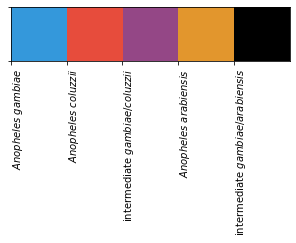

In [47]:
# Eyeball the colour palette alongside the species names
sns.palplot(palette)
_ = plt.gca().set_xticklabels(sp_nm, rotation='vertical', ha='left')

## Define a function to plot the sites

In [48]:
def plot_map(label_countries=True, pie_nsamples_min=10, pie_scale_factor=0.01):
    
    subplot_kw = dict(projection=ccrs.PlateCarree())
    # figsize here is the entire figure size in inches, reduced later by bbox_inches
    # This dpi setting affects the display size of the figure in the notebook
    fig, ax = plt.subplots(figsize=(8, 4), subplot_kw=subplot_kw, dpi=150)
    ax.add_feature(cfeature.LAND, linewidth=1, zorder=1, edgecolor='gray')
    ax.add_feature(cfeature.BORDERS, linewidth=0.5, zorder=2, edgecolor='gray')
    
    # For each site, plot the site marker or pie
    for site, metadata in sites.iterrows():
        lon = metadata['longitude']
        lat = metadata['latitude']
        nsamples = metadata['nsamples']

        # If the number of samples < the min for pies, then use a marker, else plot a pie
        if nsamples < pie_nsamples_min:
            
            plt.plot(lon, lat, marker='x', color='k', markersize=3, mew=0.5, zorder=4, alpha=0.8)
            #plt.plot(lon,lat, marker='.', color='k', markersize=4, mew=.4, zorder=4, fillstyle='none')
            
        elif nsamples >= pie_nsamples_min:
            
            # Get the centre offsets for this site
            offset_lon = sites_with_many_samples.loc[site].offset_lon
            offset_lat = sites_with_many_samples.loc[site].offset_lat
            
            # Calculate the pie's centre (offset) and radius (scaled)
            centre = (lon + offset_lon, lat + offset_lat)
            radius = np.sqrt(nsamples * pie_scale_factor)
            
            # Get the species calls for this site
            ar = sp_calls_by_site.loc[site]['arabiensis']
            it = sp_calls_by_site.loc[site]['intermediate'] # intermediate gambiae/arabiensis
            cl = sp_calls_by_site.loc[site]['coluzzii']
            gm = sp_calls_by_site.loc[site]['gambiae']
            gc = sp_calls_by_site.loc[site]['gambiae/coluzzii'] # intermediate gambiae/coluzzii
            
            # Add a circle around the pie
            ax.add_patch(plt.Circle(xy=centre, radius=radius, edgecolor='k', zorder=5, lw=2))
            
            # Add the pie
            ax.pie([gm, cl, gc, ar, it], wedgeprops=dict(zorder=7) , colors=palette, center=centre, radius=radius)

            # If either of the offsets aren't 0, then plot a line from the site center to the pie centre
            if offset_lat != 0 or offset_lon != 0:
                ln2, = ax.plot([lon, lon + offset_lon],[lat, lat + offset_lat], 'k', lw=1, zorder=5)
                ln2.set_solid_capstyle('round')


        # If option to label the countries
        if label_countries:

            for country, metadata in country_metadata.iterrows():

                # Calculate the offset centre for the country label
                lon = metadata['longitude'] + metadata['offset_lon']
                lat = metadata['latitude'] + metadata['offset_lat']

                # If there is no corresponding multiline country then default
                long_label = country_names_as_multiline.get(country, country)

                # Add the text
                country_label = plt.text(lon, lat, long_label, fontsize=6, ha='center', zorder=10)
                country_label.set_path_effects([PathEffects.withStroke(linewidth=1.5, foreground='w')])


    # Legends
    
    # Cover up islands under the legend, e.g. Ascension Island, using a white rectangle 
    ax.add_patch(patches.Rectangle((-14.5,-8.5), 1, 1 , linewidth=1, edgecolor='w', facecolor='w', zorder=3))
            
    ## Species colour legend
    plt.text(-21.7, -3, 'Species', fontsize=7, fontweight='bold')
    swatch_y = -5.4
    swatch_text_y = -6
    for i in range(0, 4):
        plt.plot([-18.5, -21], [swatch_y, swatch_y], color=flat[i], lw=7, zorder=11, solid_capstyle='round')
        plt.text(-17, swatch_text_y, s=sp_nm[i], fontsize=7 )
        swatch_y -= 2.5
        swatch_text_y -= 2.5

    # Sample size legend
    plt.text(-21.7, -19, 'Sample size', fontsize=7, fontweight='bold')
    l0 = Line2D([], [], marker = 'x', markersize=3.5, markerfacecolor='k', color='k', alpha=0.7, linestyle='None')
    l1 = Line2D([], [], marker = 'o', markersize=4.9, markerfacecolor='k', color='w', alpha=0) 
    l2 = Line2D([], [], marker = 'o', markersize=8.5, markerfacecolor='k', color='w', alpha=0) 
    l3 = Line2D([], [], marker = 'o', markersize=11.3, markerfacecolor='k', color='w', alpha=0)
    labelz = [f"n<{pie_nsamples_min}", f"n={pie_nsamples_min}", " n=50", "  n=100"]
    leg = ax.legend([l0, l1, l2, l3], labelz, ncol=4, frameon=False, fontsize=6.5, handlelength=1, loc=3,
                    borderpad=1.6, handletextpad=0.6, bbox_to_anchor=(-0.02, 0.0))
    ax.add_patch(plt.Circle(xy=(-12.6,-21.3), radius=np.sqrt(10 * pie_scale_factor), facecolor='k', zorder=12, lw=1))
    ax.add_patch(plt.Circle(xy=(-4.3,-21.3), radius=np.sqrt(50 * pie_scale_factor), facecolor='k', zorder=12, lw=1))
    ax.add_patch(plt.Circle(xy=(4.4,-21.3), radius=np.sqrt(100 * pie_scale_factor), facecolor='k', zorder=12, lw=1))

    # This needs to be near the end
    ax.set_extent([-23, 47, -21, 16])
    
    # `bbox_inches='tight'` only saves a tight bounding box around the figure, otherwise surrounding white-space as per figsize
    # DPI set as a precaution, in case bitmaps are included in the SVG
    fig.savefig('../content/images/sample_collection_map.svg', bbox_inches='tight', dpi=300)
    
    return ax

## Produce the map using the plot function

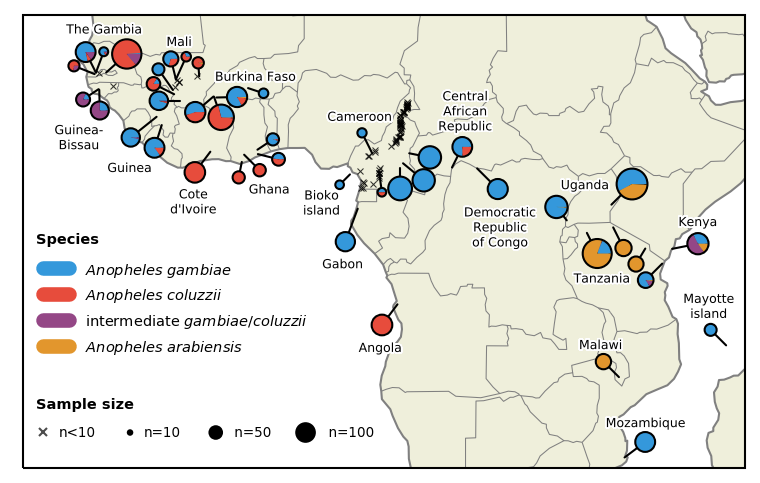

In [49]:
ax = plot_map(pie_nsamples_min=site_nsamples_cutoff)